In [ ]:
%load_ext autoreload
%autoreload 2
from notebook import *
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

<div class="namebox">    
Double Click to edit and enter your

1.  Name
2.  Student ID
3.  @ucsd.edu email address
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 10px;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">
Assignment/Lab 4: Exploiting the features of modern processors
</div>

In this assignment, you'll learn about the concepts of:

1. Function calls and compiler optimizations
2. Instruction-level parallelism
3. Memory level parallelsim
4. Superscalar/out-of-order pipeline
5. Branch prediction

You are strongly encouraged to go through the following documents before starting.
1.  The x86-64 assembly http://www.cs.cmu.edu/~fp/courses/15213-s06/misc/asm64-handout.pdf
2.  Intel Alder Lake CPU Architectures https://ieeexplore.ieee.org/document/9747991

This assignment includes a programming assignment. 

Check the course schedule for due date(s).

We need to thank [Dr. Steven Swanson](https://cseweb.ucsd.edu/~swanson/) as a significant part of the assignment is orginated from Dr. Swanson's teaching materials.

# FAQ and Updates

* There are no updates, yet.

## Keeping Your Assignment Up-to-Date

Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza when an update is avaiassignmentle.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  **Save your notebook in the browser first**.


```
cd <your directory for this assignment>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new assignment. It will fail 
                                              # harmlessly if you run it more than once.
cp assignment-lab.ipynb assignment-lab.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:

```
./fix-repo
./pull-updates
```


Be sure to save your current progress!!!

Then run this cell. It'll fix your git repo history so you can successfully merge in updates

In [ ]:
!./fix-repo
!./pull-updates

Then, reload this page in your browser.

## How To Use This Document

You will use Jupyter Notebook to complete this assignment.  You should be able to do much of this assignment without leaving Jupyter Notebook.  The main exception will be some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [ ]:
print("I'm in python")

Code cells can also execute shell commands using the `!` operator.  Try it below:

In [ ]:
!echo "I'm in a shell"

### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

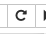


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

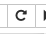

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

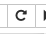

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

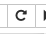

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get something like `failed: no such file or directory`, please make sure you executed all cells before the current one.
2.  Sometimes `cse142 run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) and restart the kernel seems to jolt it awake and cause it to continue.
3. If you get errors similar to `NameError: name 'render_csv' is not defined` or something similar, please re-execute the very beginning cell of this document.

### The Embedded Code

The code embedded in the assignment falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the assignment will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-danger">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

## Grading

### CSE142
If you are taking CSE142, you will need to submit the CSE142&CSE142L questions before each CSE142 assignment deadline. These questions will be graded based on correctness.

### CSE142L
Your grade for this lab report will be based on your completion and submission of this notebook.


Check Gradescope for the due dates.

### Submissions

Instructions for submitting the assignment/lab are at the end of the assignment/lab.

No late work or extensions will be allowed.

# Meeting Our Processor Again$^2$
In this assignment, we continue using our Intel Core i3 12100F processor. Now, we will dive more into this processor and connect the processor with what you've learn in class.

Intel Core i3 12100F using Intel's Alder Lake architecture. You may find more detail about this processor architecture from the following paper [Intel Alder Lake CPU Architectures](https://ieeexplore.ieee.org/document/9747991).

In [ ]:
! cse142 run 'lscpu'

Since Alder Lake is an x86 processor, you're strongly encourage to review x86 assembly before starting the rest of the assignment. You may find [this link](https://www.cs.virginia.edu/~evans/cs216/guides/x86.html) useful 

# Optimization

Compiler optimizations affect program performance through more intelligent use of instrcutons.  Besides register assignment that we've learned from the previous assignment, there are more optimizations. In the exercises below, we'll look at some of the most important optimizations that compilers perform and why and how they work on modern processors.

We have several goals:

1.  To provide some intuition about what the compiler can and cannot do, so you can predict when it will need your help and when you should trust it to "do the right thing".
2.  To see how and why optimization is so important for languages like C++.
3.  To gain further insight into how a computation is implemented affects its performance (via the performance equation).

## Common sub-expression elimination

A _common sub-expression_ is a piece of repeated computation in a program.  Since calculating the same thing twice is a waste of time, the compiler will eliminate the second instance and reuse the result of the first.  Here's an example:

In [ ]:
CSE = build(code(r"""
extern "C" int foo(register int a, register int b){
   register int c = a * b;
   return a * b + c;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([CSE[0].source("foo"),CSE[0].asm("foo"),CSE[1].asm("foo")],["source", CSE[0].get_build_parameters(), CSE[1].get_build_parameters()])

Again, the unoptimized code does some inefficient things.  I encourage you to trace through the assignments/`movl`s (`a` is in `%edi` and `b` is in `%esi`), but the key thing is that it performs two `imull` instructions that compute the same result.

The optimized code, just computes the product once and stores it in `%edi`.  Then it use `leal` to add `%rdi` to itself. and store the result in `%eax`.  

<details>
    <summary>Pro Tip</summary>

**Pro Tip; `lea` in action** Recall that `leal` computes the effective address of it's first argument and stores that address in its second argument.  In this case, it uses the `(r1,r2)` addressing mode which adds `r1` and `r2` together to compute the effective address.  Using `leal` in this way is a very common idiom in x86 assembly, because most x86 instructions overwrite one argument.  `lea`, however, does not.
    
</details>

It's useful to know what common sub-expressions the compiler can eliminate because it lets you write more natural code.  Consider these two (equivalent) code snippets:

```
if (k < array[len - 1] ) {
   k = array[len - 1];
}
```
and 

```
int t = len - 1;
if (k < array[t] ) {
   k = array[t];
}
```

In the second, the programmer has effectively performed common sub-expression elimination explicitly leading to longer and (I would argue) less readable code.  

A programmer without the benefit of CSE142L might think the longer code is faster, but the savvy alumnus of this class will know they can rely on the compiler to eliminate the extra work automatically.

## Loop invariant code motion

_Loop invariant code motion_ identifies computations in the body of a loop that don't change from one iteration to the next.  The compiler can _hoist_ that code out of the loop, saving instructions.  For example:

In [ ]:
LICM = build(code(r"""
extern "C" int foo(register int a, register int b){
    register int c = 0;
    for(register int i = 0; i < a; i++) {
        c += b*a;
    }
    return c;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([LICM[0].asm("foo"),LICM[1].asm("foo")],[LICM[0].get_build_parameters(), LICM[1].get_build_parameters()])

#display(unopt.source)
#compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])
#compare([unopt.cfg, opt.cfg], ["Unoptimized", "Optimized (-O1)"])

Quite a bit changes when we turn on optimizations, but the key thing to notice is that the unoptimized code has an `imull` in the loop body while the optimized code does not.  In the optimized code, the `imull` has been moved into a new basic block called a _loop header_.

## Strength reduction

In _strength reduction_ the compiler converts a "stronger" (i.e., more general and/or slower) operation into a "weaker" (i.e. less general and/or faster) operation.  The most common example is converting multiplication and division by powers of two into left and right shifts.

For example:

In [ ]:
SR = build(code(r"""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a *8;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR[0].asm("foo"),SR[1].asm("foo")],[SR[0].get_build_parameters(), SR[1].get_build_parameters()])

We don't even need to look at the optimized code to find strength reduction.  Strength reduction is such a common optimization that the compiler does it even when we tell it not to optimize.  Note that there is no `mull` instruction, but there is a shift arithmetic left long (`sall`) instruction with a constant `$3` that multiplies `%eax` by 8.

The optimized code does one better and folds the whole function in one `leal`.  The `n(,%r,k)` addressing mode multiplies register `%r` times `k` and adds it to `n`.  `k` must be power of two, which means that the processor can use a left shift to implement it.

Changing multiplies and divides in to shifts is not the only kind of strength reduction that is possible.  In the fiddle below change the `a*8` to the expressions given in the question below and see what the compiler does:

In [ ]:
SR2 = build(code(r"""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a *8;
}
int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR2[0].asm("foo"),SR2[1].asm("foo")],[SR2[0].get_build_parameters(), SR2[1].get_build_parameters()])

<div class="alert alert-block alert-warning">


<div class="question completeness">

### Question 1 (CSE142L Only)    

<div class="question-text"> 
    
Try replacing `a*8` with each of the following.  Describe what the compiler does:
    
</div>
</div>
</div>

In [ ]:
# Please put your command that runs the program and result here.

<div class="alert alert-block alert-warning">

<div class="answer">

|        | What the compiler did | 
|--------|-----------------------|
| `a*3`   |  |  
| `a*5`|  |
| `a*11`|  |
| `a/b`| |
| `a/3`| |

</div>
</div>

</div>

## Constant propagation

_Constant propagation_ allows the compiler to identify the value of constant expressions at compile time and use those constant values to simplify computations.  This effectively executes part of the program _at compile time_ and embeds the result in the assembly.

For example:

In [ ]:
CP = build(code(r"""
extern "C" int foo(register int a, register int b){
    register int c = 4;
    register int d = 4;
    return a + c + d;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1 -fno-inline"]))

compare([CP[0].asm("foo"),CP[1].asm("foo")],[CP[0].get_build_parameters(), CP[1].get_build_parameters()])

Again, the compiler is doing multiple things at once, but the constant propagation is visible:  In the unoptimized code, it moves `$4` into both `%r12d` and `%ebx` and then adds both those register to `%eax` on the next two lines.  In the optimized code it's folded both `4`s into the `8` in the `leal` instruction.  Here, `leal` is using the `n(%r)` addressing mode which adds a constant `n` to `%r`.  In this case, that enough to implement the entire function.

So what happened to variables `c` and `d`?  They are gone!

The compiler can make bigger things disappear:

In [ ]:
CP2 = build(code(r"""
extern "C" int foo(register int a, register int b){
    register int i, s = 0;
    for(i = 0; i < 10; i++) {
        s+= i;
    }
    return s;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1 -fno-inline"]))

compare([CP2[0].asm("foo"),CP2[1].asm("foo")],[CP2[0].get_build_parameters(), CP2[1].get_build_parameters()])

Since the compiler can evaluate the whole loop at compile time, it does.
Bye, bye loop!  

![Bye bye](https://media3.giphy.com/media/SABGACIrfegQ4O1Aey/200w.webp?cid=ecf05e47aa8u3emxknrkw6fv3rpkesce1x1nog5t1hjpoang&rid=200w.webp&ct=g)

# Practical Rules For Using Compiler Optimizations

The single most important lesson to learn from this assignment is that you should compile your code with optimizations turned on.  It is the easiest 2-10x boost in performance you can get.

Fortunately, it's pretty simple to do that.  Somewhat overwhelmingly, Gcc provides around [300 flags](https://gcc.gnu.org/onlinedocs/gcc/Optimize-Options.html) that control optimization and a bunch of tunable parameters as well, but in practice you don't need to worry about them.

There are just a handful that are typically useful.  Here's what the gcc docs have to say about them:

* `-O0`: Perform no optimizations.  You should never use this unless you're just playing around.
* `-O1`: "the compiler tries to reduce code size and execution time, without performing any optimizations that take a great deal of compilation time."
* `-O2`: "GCC performs nearly all supported optimizations that do not involve a space-speed tradeoff."  "Space" in this context means the number of static instructions generated.
* `-O3`: "Optimize yet more"
* `-Og`: "Optimize debugging experience. -Og should be the optimization level of choice for the standard edit-compile-debug cycle, offering a reasonable level of optimization while maintaining fast compilation and a good debugging experience."

Among these, `-Og` is a relatively new flag that "optimizes the debugging experience".  What does that mean?  The optimizations we described above (especially function inlining, but others as well) can cause strange behavior when you debug.  For instance, consider the inlined version of `one()` in the previous section.  If you set a break point on `std::sort()`, your code would never stop because that function is never called.  Likewise, we've seen loops and variables disappear.  This can make debugging really difficult.  On the other hand, compiling with `-O0` will make the code much, much slower (just look at the graphs above).  So `-Og` strikes a balance:  It optimizes but avoids these problems in debugging.

# The Perils of C++

C++ is a big, complex mess of a language that includes a bunch of powerful tools that make it possible to write fast code without too much pain.  However, all that power translates into a lot of complexity that shows up in the assembly code generated for C++ programs.  
In order to read C++ assembly output, you need to understand a few details about one aspect of this implementation process: linking.

## What Is Linking?

Linking is the final step in compiling a program.  Non-trivial programs are spread across multiple source files that are compiled one-at-a-time into _object files_ (`.o`) that contain binary instructions and static data (e.g., string constants from your code).  Each function and global variable in the object file has a name called a _symbol_.  We say that the object file _defines_ the symbols it contains.  For instance, if `foo.cpp` contains the source code for a function `bar()` then, `foo.o` will define the symbol `bar`.

The code in the object files will also _reference_ symbols defined in other object files.  For instance, if another file, `baz.cpp`, calls `bar`, then `baz.o` will have reference to `bar`.  Prior to linking, that reference is _undefined_.

The linker takes all the `.o` files and copies their contents into a single executable file.  As it copies them it _resolves_ the undefined references.  In 
this example, the linker resolves the undefined reference in `bar.o`  by replacing the reference with pointer to the code for `bar()` in  `foo.o`.

One important thing about linkers is that they are language-agnostic -- the linker will happy link object file generated from C++, C, Go, or Rust as long as the symbols match.

There's a lot more to [linking](https://www.amazon.com/Linkers-Kaufmann-Software-Engineering-Programming/dp/1558604960), but this is enough to see what's problematic about C++.

## C++ Name Mangling

The linker restricts what strings can serve as valid symbols: Symbols must start with a letter (or `_`) and only contain letters, numbers, and `_`.

For C, this poses no problems. If you declare a function `bar` in file `foo.c`:

``` c++
int bar(int a) {
    return 1;
}
```

The compiler will generate exactly one symbol with the name `bar`.   Then you can call it from another file `baz.c`:

```  c++
main() {
     bar(4);
} 
```

and the linker will know what function you mean (i.e., the function named `bar` from `foo.c`).

However, C++ allows function overloading, so we might have this in `foo.cpp`:

``` c++
int bar(int a) {
}

float bar(float a) {
}

```

This will generate two functions, so they need two symbols.  But what symbols should the compiler choose?  The compiler needs a systematic way of naming functions _that includes their type information_.  This will ensure that when we have `baz.cpp` with

``` c++
main() {
    bar(4);
    bar(4.0);
} 
```

The linker will know that we mean to call two different functions.

Things get more complex with templates, since we could have:

``` c++
int bar(const std::map<std::string, std::vector<int>> & a) {
}
```

That's a lot of information to pack into one symbol!

The solution that C++ compilers have adopted is called _name mangling_.  Name mangling is a deterministic, standardized way to convert _any_  function type and type into a unique symbol.

Let's see what it does.  Run the fiddle and answer the question:

In [ ]:
fiddle("mangle.cpp", function="foo", opt="-O3", cmdline=r"",
code=r"""
#include<map>
#include<vector>
#include<string>
int foo(int a) {
    return 0;
}

float foo(float a) {
    return 0;
}

int foo(const std::map<std::string, std::vector<int>> & a) {
    return 0;
}
""")
unopt = fiddle("mangle.cpp", function="foo", opt="-O3")
! g++ -O3 -S build/mangle.cpp
compare([do_render_code("build/mangle.cpp"),do_render_code("mangle.s")])

<div class="alert alert-block alert-warning">

<div class="question completeness">

### Question 2 (CSE142L Only)

<div class="question-text"> What's the mangled name for each of these functions?</div>
</div> 
</div>

<div class="alert alert-block alert-warning">
<div class="answer">

| function | mangled name |
|----------|--------------|
| `int foo(int a)` | | 
| `float foo(float a)` |  | 
| `int foo(const std::map<std::string, std::vector<int>> & a)`| |

    
</div>

</div>

As you can see, mangled names make assembly pretty hard to read. To make matters worse, mangled names show up in other places as well (e.g.,  the output of profiling tools).

You'll notice that the full name for `int foo(const std::map<std::string, std::vector<int>> & a)` is very long.  This is because it includes full type names (including the C++ namespace) and all the default template parameters.

## C vs C++ Linkage

The way that the compiler generate symbols for a function is called the function's _linkage_.  We've seen two kinds:  C linkage which just uses the function name  and C++ linkage which uses mangled names.

You might have noticed that some of the code examples have `extern "C"` before some functions.  This is a way of telling the compiler that it should use C linkage for those functions (i.e., just use the function names).  You can use it for one function:

``` c++
extern "C" int foo()
```

or a group of functions:

``` c++
extern "C" {
    int foo(){}
    int bar(){}
}
```

This is useful if you want to call the function from a language other than C++ (e.g., C).  We will use it in the examples, because it makes it easier to refer to the functions.


# Branch performance in modern processors

## Measuring Branch Performance with Performance Counters

We'll again use performance counters to measure cache performance on our bare metal machines in the cloud.  We've use the same tools we've used so far to measure `IC`, `CPI`, `CT` and cache miss rates. This time, let's using performance counters to report the branch instruction performance. 

Do you remember the demo code back to the very first lecture?

In [ ]:
compare([do_render_code("array_sort.cpp",show=["//START","END"]),do_render_code("calculate_sum.c",show="calculate_sum")])

Let's measure the branch performance of the for loop that performs similar mission as our demo before in the array_query.cpp:

In [ ]:
t = fiddle("array_query.cpp", function="array", opt="-O1", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t array(uint64_t * data, uint64_t data_size, uint64_t *queries, uint64_t query_size) {
    uint64_t sum=0;
    for(unsigned int i = 0; i < query_size; i++) {
        for(unsigned int j = 0; j < data_size; j++) {
            if(data[j] <= queries[i])
                sum++;
        }
    }
    return sum;
}

FUNCTION(two_arrays, array);
""")

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 3 (CSE142 & CSE142L)


When `data_size=131072`, how many branch instructions are there in the above `array()` function? Assume the processor uses an advnaced branch predictor similar to the tournament introduced in the class with reasonably long history and high accuracy, what's the accuracy of branch prediction?
**Please explain and show your work in detail**

</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

**Number of Branch Instructions:**
    
**Branch prediction accuracy:**
    
**Show your work:**
</div>
</div>


Run the cell below to see the measurements.

In [ ]:
!rm -f build/array_query.so; make fiddle.exe; make MICROBENCH_OPTIMIZE=-O0 build/array_query.so
!cse142 run 'fiddle.exe -l build/array_query.so -f array -i 1 --sort 0 1 --detail -s 131072 262144 --size2 4096 16384 -M 4000 -o array_query.csv'

Now, let's show the result in a table. 

In [ ]:
display_mono(render_csv("array_query.csv", columns=["arg1", "function","size", "size2","sorting", "IC", "CPI", "CT","ET", "L1_dcache_miss_rate", "L1_dcache_misses", "L1_dcache_accesses", "branches", "branch_misses"]))

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 4 (CSE142 & CSE142L)



When running the `array()`, if the execution with `--sort` set to 1, fiddle will sort the input data array before running the function. According to the data above, what's the most significant factor make the performance of the `array()` function better when data is sorted? **Please explain in detail**?

</div>
</div>
    

<div class="alert alert-block alert-success">    
<div class="answer">
Answer:
    
</div>
</div>
</div>

## Reducing branches

Even though we have highly accuracy branch predictors in modern processors, they can never be perfect. To fundamentally avoid branch miss penalty, the best approach is probably the elimination of branch instructions. 

### Loop unrolling
The first mechanism is loop unrolling. In loop unrolling, the compiler or the programmer "unrolls" a loop so that the loop body contains the computation for multiple iterations of the loop. For instance:

In [ ]:
fiddle("unroll0.cpp", function="foo", opt="-O0", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C" 
int foo(uint64_t * data, uint64_t data_size){
    register unsigned int i, sum = 0;
    for(i = 0; i < data_size; i++) {
        sum+= data[i];
    }
    return sum;
}

FUNCTION(one_array, foo);
""")
unopt = fiddle("unroll0.cpp", function="foo", opt="-O1 -funroll-loops")
! gcc -O1 -S build/unroll0.cpp

In [ ]:
fiddle("unroll1.cpp", function="foo", opt="-O0", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C" 
int foo(uint64_t * data, uint64_t data_size){
    register unsigned int i, sum = 0;
    unsigned int size = data_size >> 3;
    for(i = 0; i < size*8; i++) {
        sum+= data[i];
    }
    for(; i < data_size; i++) {
         sum+= data[i];
    }
    return sum;
}

FUNCTION(one_array, foo);
""")
opt = fiddle("unroll1.cpp", function="foo", opt="-O1 -funroll-loops")
! gcc -O1 -funroll-loops -S build/unroll1.cpp

In [ ]:
compare([do_render_code("unroll0.s", show=["foo:",".LFE2984"]),do_render_code("unroll1.s", show=["foo:",".LFE2984"])])

<div class="alert alert-block alert-success"> 

### Question 5 (CSE142 & CSE142L)


Using the generated x86 assembly code, please estimate the total number of dynamic instructions (the instruction count when executing the program) for the ```foo``` function unroll0.cpp and unroll1.cpp. Assume ```data_size``` is 10000. How many of them are branch instructions?
    
**Please show your work regarding how to know the answer in detail**

</div>

<div class="alert alert-block alert-success">   


|File  | Total dynamic instructions| Total dynamic branch instructions|
|------|---------|------|
|unroll0.cpp|     |      |
|unroll1.cpp|     |      |

**Please show your work regarding how to know the answer in detail**

</div>

## Function Call Overhead 

In addition to conditional jumps, function calls are also chances where program may change its control flow.  When you a write a function, the code you write turns into the "body" of the function.  However, the processor has to do some work to _make_ the function call and each function includes some overhead instructions in addition to instructions for code the function contains.  For example, consider this code:

In [ ]:
fiddle("prologue.cpp", function="", opt="-O0", cmdline=r"",
code=r"""
long int sum(long int a, long int b) {
    return a + b;
}

int main(){
    return sum(1,2);
}
""")
! make build/prologue.s
render_code("prologue.s")

### The Application Binary Interface (ABI)

There are several standardized protocols for how arguments are passed to functions and even how names are mangled.  These protocols are called "application binary interfaces" or ABIs.  It's important that the caller (the function that calls) and the callee (the function that is called) agree on the ABI.   The ABI dictates which arguments go in which register and in what order, the number of bits in an `int` vs a `long int`, how things like pass-by-value vs. pass-by-references are implemented, and how C++ virtual function tables (which implement virtual functions) are laid out. Generally speaking, if two object files (i.e., `.o` files) were compiled with the same ABI, functions in one object file can call functions in another.  

For the most part, you can think of there being one ABI per operating system, but that's not completely accurate.  Linux has (at least) two: one for the kernel and one for user programs.  Microsoft has one.  Intel has defined a standard as well.  The [wikipedia page](https://en.wikipedia.org/wiki/Application_binary_interface) has a little more detail.
    
If you're curious, use the fiddle to see how the compiler passes, `struct`s, pointers to `struct`, and C++ references to `struct`s.  What's surprising about how it implements those three different language constructs?

The body of `sum` is very simple:  It should just be a single add instruction, but instead it has to return as well.   The _call site_ in `main` takes 3 instructions (the `ret` is part of the overhead for calling `main`, not `sum`).

In this case, the _function call overhead_ is four instructions: 1 x `ret`, 2 x `movl`, and 1 x `call`.

<div class="alert alert-block alert-warning">


### Question 6 (CSE142L Only)    
    


What happens to function call overhead if you add more arguments (something interesting happens past 8)?  What if pass a struct?   How does the complexity of _the caller_ affect function call overhead?
Please modify the following prologue_2 and compare with prologue and explain.

</div>
    

In [ ]:
fiddle("prologue_2.cpp", function="", opt="-O0", cmdline=r"",
code=r"""
long int sum(long int a, long int b, long int c) {
    return a + b + c;
}

int main(){
    return sum(1,2, 3);
}
""")
! make build/prologue_2.s
render_code("prologue_2.s")

<div class="alert alert-block alert-warning">    

Answer:
    

</div>

### Removing Function Call Overheads

One way to remove the function call overhead is to copy the body of the function (i.e., the useful part) to the caller.  Then, we don't need to pass arguments, make the `call`, or do the `ret`.
The compiler can do this automatically by _inlining_ the function.

For instance, the compiler can inline `foo` into `loop`:

In [ ]:
loop_unopt = fiddle("inline1.cpp", function="main", opt="-O0", code="""


extern "C" int inline __attribute__ ((used)) foo( register int a, register int b) { 
    return a + b;
}

int main(int argc, char * argv[]){
    register int i;
    register int s = 0;
    for(i = 0; i < argc; i++) {
        s += foo(i,i);
    }
    return s;
}
""")
!make MICROBENCH_OPTIMIZE="-O0" build/inline1.s
compare([do_render_code("inline1.s", show=["main:",".LFE1:"]),do_render_code("inline1.s", show=["foo:",".LFE0:"])])

Now, let's try function inlining.

In [ ]:
!make MICROBENCH_OPTIMIZE="-O1 -finline-functions " build/inline1.s
compare([do_render_code("inline1.s", show=["main:",".LFE1:"]),do_render_code("inline1.s", show=["foo:",".LFE0:"])])

When the compiler is finished with `loop()` it contains all the code that was in `foo()`.  It also no longer contains a function call at all.

<div class="alert alert-block alert-warning">



### Question 7 (CSE142L Only)    




Based on the change in instruction count (IC), how much speedup does inlining provide in this case? 
Please explain in detail.    

</div>

<div class="alert alert-block alert-warning">    
<div class="answer">
Answer:
</div>
</div>

<details>
    <summary>Inlining and instruction count</summary>
    
Without inlining, each trip through `for` loop takes 15 instructions (8 in `loop()` and 7 in `foo()`).  With inlining, it's 4.  
    
How big a difference this makes depends on the value of `argc`.  Let's assume it's large (like 100).  In this case the instructions before and after the loop contribute very little to `IC` and we can ignore them.   So the speedup (ignoring the first and last basic block) approximately 14/4 = 3.5x.
</details>

But this is just the beginning of inlining's power, because it also vastly increases the opportunities to apply other optimizations.  Consider `foo()` in the example above.  Without inlining, the compiler can only apply optimizations that will work for _all_ values of `a` and `b`.  However, once `foo()` is inlined, the compiler can optimize _that copy_ of `foo()` for the values of `a` and `b` at that call site.  Then it is free to apply all the other optimizations we've discussed already.

For instance:

In [ ]:
caller_unopt = fiddle("inline2.cpp", opt="-Og", code="""

extern "C" inline int loop(register int a) { 
    register int i;
    register int sum = 0;
    for(i = 0; i < a; i++) {
        sum += i;
    }
    return sum;
}

extern "C" int caller(register int a) {
    return loop(20);
}

int main(){
    caller(1);
}
""")
#caller_opt = fiddle("inline2.cpp", function="caller", run=False, remove_assembly=False, opt="-O3")
#loop_unopt = fiddle("inline2.cpp", function="loop", run=False, remove_assembly=False, opt="-Og -fkeep-inline-functions")

!make MICROBENCH_OPTIMIZE="-Og -fkeep-inline-functions" build/inline2.s
compare([do_render_code("inline2.s", show=["main:",".LFE2:"]),do_render_code("inline2.s", show=["caller:",".LFE1:"]),do_render_code("inline2.s", show=["loop:",".LFE0:"])])

With inlining and compiler optimizations:

In [ ]:
!make MICROBENCH_OPTIMIZE="-O3" build/inline2.s
compare([do_render_code("inline2.s", show=["main:",".LFE2:"]),do_render_code("inline2.s", show=["caller:",".LFE1:"]),do_render_code("inline2.s", show=["loop:",".LFE0:"])])

Bye bye, function call!  Bye Bye, loop!

![bye bye](https://media3.giphy.com/media/tuvMgAPzxaQBq/200.webp?cid=ecf05e47jb4f5ojpiqlpr9o2b5wdn980swe4q4pcbwxmbxcu&rid=200.webp&ct=g)


<div class="alert alert-block alert-warning">


### Question 8 (CSE142L Only)    



Which optimizations did the compiler apply to come up with inlined, optimized version of `caller()`?  For each optimization explain what it accomplished.
    

</div>
    

   
<div class="alert alert-block alert-warning">

<div class='answer'>
Answer:

</div>
</div>

</div>

<div class="alert alert-block alert-danger">

**Summary**

The compiler applied:
    
1. Inlining -- It merged `foo()` into the loop.
2. constant propagation -- The loop bound becomes constant.
3. Loop unrolling -- It completely unrolled the loop because it has a constant loop bound.
4. constant prop -- It evaluated the unrolled loop at compile time.
</div>

# Instruction Level Parallelism

As you learned in CSE142, modern processors can exploit parallelism between instructions by fetching a large "window" of instructions and dynamically identifying instructions that can execute at the same time. The algorithm it uses is pretty amazing and the fact that processors can do this at over 3GHz is mind-blowing.

But how well does it work?  How much ILP can we get?  Where does ILP come from?

## Let's Look at Our Machine

This class is using an Intel Core i3 "Alder Lake" processor. Therefore, we will intensively go through some technical details in [Intel Alder Lake CPU Architectures](https://ieeexplore.ieee.org/document/9747991) paper. Unlike other siblings in the Alder Lake family, our processor only contains "performance cores", or say P-Cores in this architecture. Figure 1 of the [Intel Alder Lake CPU Architectures](https://ieeexplore.ieee.org/document/9747991) paper provides the block diagram of each P-core (as we put below).

![image](img/alder_lake_architecture.png)

In the integer block (red block), 5 function units can all execute basic arithmetic operations ("ALU"), 5 units ("AGU") can execute address calculation instructions like `lea`, and two can only execute store instructions.  Each AGUs is connected to a load/store units. This means that processor can issue up to 3 memory load operations or 2 store per cycle. According to the paper, the memory subsystem can handle up to 3 32-byte loads or 2 64-byte loads, as well as up to two 64-byte stores per cycle, providing simultaneous 128 bytes of read bandwidth and 128 bytes of write bandwidth per cycle.

<div class="alert alert-block alert-success">

<div class="question correctness">
    
### Question 9 (CSE142 & CSE142L)

<div class="question-text">
    
Based on Figure 1 in the Intel Alder Lake paper, what's the minimum achievable CPI for ALU operations on our CPU? For load/store operations? For all operations?
    
</div>
    </div>
    </div>

<div class="alert alert-block alert-success">   
<div class="answer">
    
**Minimum possible ALU CPI**:
    
**Minimum possible load/store CPI**:

**Minimum possible total CPI**:
    
</div>
</div>

<details> 
<summary>How to get the minimum possible CPI?</summary>

It appears that the CPU can execute five ALU operations in one cycle.  So the minimum CPI would be 1/5 = 0.2.
    
For loads/stores, it seems we can do up to 7 per cycle, so the CPI should be 1/7 = 0.14 or 3 loads per cycle so 1/3 = 0.33 for loads or 4 stores per cycle, so 1/4 = 0.25 for stores.

All together (loads, stores, ALU, and **branches**), it appears that 1/12 = 0.08 should be possible.
</details>

<div class="alert alert-block alert-warning">


### Question 10 (CSE142L Only)    


    
Based on this design, do you think the designers are more concerned about achieving parallelism between memory operations or arithmetic (non-memory) operations?
    

</div>

<div class="alert alert-block alert-warning">
<div class="answer">
Answer:  
</div>
</div>

<div class="alert alert-block alert-danger">

Interesting Question --
    
    
Why does it "execute" the data and address for a load/store separately?
         
</div>

## Experiments

Here's a simple function (run the code to see it).  I've turned off optimizations and use `register` to get `i` into a register.

Study the code and pay particular attention to the data dependences between the instructions in the inner loop body.

In [ ]:
t = fiddle("ilp.cpp", function=["wide_1", "wide_2", "wide_3", "wide_4", "wide_5"], name="ilp", opt="-O0", run=[], 
           cmdline=f"-size 10000000", 
           perf_cmdline="-M 4000")
! rm -f build/ilp.so; rm fiddle.exe; make MICROBENCH_OPTIMIZE='-O0 -g' build/ilp.so fiddle.exe; make MICROBENCH_OPTIMIZE=-O0 build/ilp.s
compare([do_render_code("ilp.cpp",show="wide_1"),do_render_code("ilp.s", show=["wide_1:",".LFE2876:"])])

<div class="alert alert-block alert-info">



### Question 11 (CSE142 Only)     
    

Looking at the assembly code of `wide_1()`,
what's the critical path length through $n$ iterations of the inner loop body of `wide_1()`?  Based on the dependences in the inner loop (between .L19 and .L18), estimate the CPI for this code (assuming the inner loop runs many, many times).        

</div>

<div class="alert alert-block alert-info">   
<div class="answer">

1. **critical path**:
    
2. **CPI**:
</div>
</div>

<details>
    <summary>How to find and estimate the latency of the critical path</summary>

All the `addq` instructions in the body read and write `rbx`, so each is dependent on the one prior to it, and there is a cross-loop dependence on `rbx` as well.
    
Further, the `cmpq` is dependent on the last `addq` as well, and the `jnb` is dependent on the `cmpq`. However, they don't add to the critical path for two reasons:
    
1. Nothing is dependent on the `jnb`
2. The `jnb` is a very predictable branch, so it and the `cmpq` will not affect execution very much.  Likewise, we can ignore the `jmp` as well.
    
So, the critical path for $n$ iteration is $5n$.

The nominal latency for an `addq` is 1 cycle, so the latency of $n$ iterations is about $5n$ cycles.    There are 9 instructions per iteration, so `CPI` should be 5/9 = 0.55.

</details>

Let's see how it comes out:

In [ ]:
! cse142 run "./fiddle.exe -s 10000000 -M 4000 -l build/ilp.so -f wide_1 -o ilp.csv"

display_mono(render_csv("ilp.csv", columns=["function", "IC", "CPI", "CT", "ET"]))

Pretty good agreement!

Let's try another function, ``wide_2``.  Same questions.

In [ ]:
t = fiddle("ilp.cpp", function=["wide_1", "wide_2", "wide_3", "wide_4", "wide_5"], name="ilp", opt="-O0", run=[], 
           cmdline=f"-size 10000000", 
           perf_cmdline="-M 4000")
! cse142 run "rm -f build/ilp.so; rm fiddle.exe; make MICROBENCH_OPTIMIZE='-O0 -g' build/ilp.so fiddle.exe; make MICROBENCH_OPTIMIZE=-O0 build/ilp.s"
compare([do_render_code("ilp.cpp",show="wide_2"),do_render_code("ilp.s", show=["wide_2:","wide_2_reg:"])])

<div class="alert alert-block alert-success">
    
<div class="question correctness points-2">

### Question 12 (CSE142 & CSE142L)
<div class="question-text">
What's the critical path length through $n$ iterations of inner loop body of `wide_2()`?  Based on the dependences in the inner loop, estimate the CPI for this code (assuming the inner loop runs many, many times).        
</div>
</div>    
</div>

<div class="alert alert-block alert-success">
<div class="answer">

1. **critical path**: 
    
2. **CPI (show your work)**: 
</div>
</div>
</div>

Let's validate your answer to the previous question!

In [ ]:
! cse142 run "./fiddle.exe -s 10000000 -M 4000 -l build/ilp.so -f wide_2 -o ilp_2.csv"

display_mono(render_csv("ilp_2.csv", columns=["function", "IC", "CPI", "CT", "ET"]))

I have three more of these functions: `wide_3()` through `wide_5()` with more parallel sequences of dependent increments: 

In [ ]:
render_code("ilp.cpp", show="wide_5")

! cse142 run "./fiddle.exe -s 10000000 -M 4000 -l build/ilp.so -f wide_1 wide_2 wide_3 wide_4 wide_5 -o ilp_5.csv"

display_mono(render_csv("ilp_5.csv", columns=["function", "IC", "CPI", "CT", "ET"]))

In [ ]:
display_mono(render_csv("ilp_5.csv", columns=["function", "IC", "CPI", "ET"]))
plotPEBar("ilp_5.csv", what=[("function", "CPI")])

Wow, we came very close to hitting our theoretical minimum CPI!:  The processor can issue up to 5 arithmetic instructions per cycle. So we got a CPI very close to 0.2.

## Dynamic Loop Unrolling

`wide_5()` is not a very realistic function, since it has an artificially huge amount of ILP.  But ILP can arise in more natural ways as well.

Below is a function that represents a common pattern:  A loop body that computes a value based on the loop index and stores it somewhere.  In this case, the computations is a long chain of additions.   Study it and answer the question below.

In [ ]:

t = fiddle("unroll.cpp", function="unroll_1", opt="-O0",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* unroll_1(uint64_t threads, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    register uint64_t a = 4;

    for(register uint64_t i = 0; i < size; i++) {
       a = i+1;
       a = a+1;       
       a = a+1;       
       a = a+1;       
       a = a+1;       
       data[i] = a;
    }
    data[0] = a;
    return data;
}
FUNCTION(one_array_2arg, unroll_1);
""", 
           cmdline=f"--size 10000000", 
           perf_cmdline="")

In [ ]:
! rm -f build/unroll.so; rm fiddle.exe; make MICROBENCH_OPTIMIZE='-O0 -g' build/unroll.so fiddle.exe; make MICROBENCH_OPTIMIZE=-O0 build/unroll.s
compare([do_render_code("build/unroll.cpp",show="unroll_1"),do_render_code("unroll.s", show=["unroll_1:",".LFE2876:"])])

<div class="alert alert-block alert-info">



### Question 13 (CSE142 Only)


What's the critical path length through $n$ iterations of inner loop body of `unroll_1()` (assume $n$ is large)?  Estimate the CPI for this code (assuming the inner loop runs many, many times, and the latency for each instruction is 1). **You must show your work**

</div>

<div class="alert alert-block alert-info">
    
<div class="answer">

1. **critical path**:

2. **CPI**:
    
**Please show your work and explaination**
</div>
</div>    

Now, let's run it and see if your estimation matches!

In [ ]:
! cse142 run "./fiddle.exe -M 4000 -l build/unroll.so -s 10000000 -f unroll_1 -o unroll.csv"
display_mono(render_csv("unroll.csv",columns=["function", "IC", "CPI", "CT", "ET"]))

That falls a short of our expectation.  Figuring out why would require some careful investigation, but there are a few complications the analysis above didn't consider:

1.  The first movq (a load indeed) in the code block `L19` is 4 cycles, so the path from that instruction to store is 5 cycles, which is _almost_ the critical path.  Unlucky scheduling could increase the latency further.
2.  The load, store, and `lea` instructions can only issue subsets of the functional units.

<div class="alert alert-block alert-warning">

### Question 14 (CSE142L Only)    
    


Copy the code for `unroll_1()` to create new function called `unroll_byhand()`.  Can you unroll the loop by hand and get better performance than the processor can unrolling it in hardware?    

</div>

In [ ]:
# Put your modifications to the code below
t = fiddle("unroll_byhand.cpp", function="unroll_byhand", opt="-O0",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* unroll_byhand(uint64_t threads, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    register uint64_t a = 4;

    for(register uint64_t i = 0; i < size; i++) {
       a = i+1;
       a = a+1;       
       a = a+1;       
       a = a+1;       
       a = a+1;       
       data[i] = a;
    }
    data[0] = a;
    return data;
}
FUNCTION(one_array_2arg, unroll_byhand);
""")

In [ ]:
# Put your code that runs the experiements showing the CPI is better here
! make MICROBENCH_OPTIMIZE='-O0 -g' build/unroll_byhand.so
! cse142 run "fiddle.exe -M 4000 -l build/unroll_byhand.so -s 10000000 -f unroll_byhand -o unroll_byhand.csv"
display_mono(render_csv(["unroll.csv","unroll_byhand.csv"],columns=["function", "IC", "CPI", "CT", "ET"]))

# Memory-level Parallelism

One of the key themes in this class is that it's really all about memory, so it is with ILP as well:  Parallelism among arithmetic instructions is fine, but it's the parallelism among memory operations that really pays off.  

In fact memory parallelism is so important that it has its own name: Memory Level Parallelism (MLP).

Let's take a look at a new and improved miss machine and use it to explore MLP.

## Miss Machine

Look over the code and make sure you understand it.

In [ ]:
render_code("MissMachine.hpp")

## Parallel Miss Machines

We will use `MissMachine` to create parallel chains of loads much like we built parallel chains of adds in the previous section.

The code below accomplishes this by creating a miss machine, and then spreading four pointers uniformly along the circular chain of links.  Then we traverse the chain at all four points in the chain in parallel.  Here's the code and the assembly.  The key basic block is the three instructions after `.L181`, `al` and `bl` are in `rcx` and `r12`.

In [ ]:
! cse142 run "make MICROBENCH_OPTIMIZE=-O3 build/miss_machines.s; make MICROBENCH_OPTIMIZE=-O3 build/miss_machines.so"
compare([do_render_code("miss_machines.cpp", show="sample"),do_render_code("miss_machines.s", show=[".L181:",".L173:"])])

<div class="alert alert-block alert-success">


### Question 15 (CSE142 & CSE142L)

What's the critical path (in cycles) for the inner loop above?  And what's the estimated CPI.  Recall that the latency for a cache hit on our machine is 4 cycles.  Assume the loads all hit. **Please show your work and discuss in detail**

</div>

<div class="alert alert-block alert-success">
<div class="answer">

1. **critical path**:  
    
2. **CPI**:  

**Please show your work and discuss in detail**
</div>
</div>
</div>

## L1 Hits

Our goal is to measure our processor's L1 cache bandwidth by maximizing memory-level parallelism.  To do this, `miss_machines.cpp` has a function with a large switch statement that starts like this:

In [ ]:
render_code("miss_machines.cpp", show=("//START", "//END"))

Each `case` runs the same loop with a different number "miss chains" -- parallel sequences of loads.  You can look as the assembly if you want, but it's long and messy:

In [ ]:
render_code("miss_machines.s", lang="gas", show="miss_machines")

<div class="alert alert-block alert-warning">

### Question 16 (CSE142L Only)


How did the compiler implement the switch statement?  Is it faster than a sequence of `if-else` statements?

</div>

<div class="alert alert-block alert-warning"> 

Answer:


</div>

As we add more parallel chains, bandwidth will increase, but only to a point.

<div class="alert alert-block alert-info">


### Question 17 (CSE142 Only)

Based on Figure 1 in the Alder Lake architecture paper, how many parallel miss chains will produce the maximum L1 bandwidth (most loads completed per second)?  What do you think that bandwidth will be?  With that number of miss chains, what will the CPI be?  Remember: Load hits take 5 cycles. **Please show your detailed progress in deriving the answers**

</div>    

<div class="alert alert-block alert-info">   


**How many miss chains**: 

**L1 Bandwidth**:  

**CPI**:

**Please show your detailed progress in deriving the answers**


    
</div>

<details>
    <summary>How to estimate the CPI/Bandwidth</summary>

Figure 1 in the Alder Lake paper shows three load units, which suggests that the processor execute three loads per cycle.  We'll call this the maximum _issue rate_.  This would seem to suggest that 3 miss chains would be sufficient.  They would run at 4GHz giving us $3 \times 4 \times 10^9$ loads of 8 bytes per second or 96GB/s.  

However, there is a catch:  Each load takes 5 cycles.  So it's not so much that the processor can "perform" three loads at a time, but that it can _start_ three loads at a time.  Those loads will finish 5 cycles later.  In the four intervening cycles, the processor could start 12 more loads.
    
This suggests that we will need 15 miss chains to achieve our 96 GB/s.

To compute the CPI, we can look at the loop body for `mm_sample()`:

```gas
.L181:
	movq	(%rcx), %rcx
	movq	(%r12), %r12
	subl	$1, %eax
	jne	.L181
```

Two loads -- one per miss chain -- and 2 more instructions.  With 8 chains, that'd be 10 (1 per miss-chain + 2 more) instructions per loop iteration with a critical path of at least 5 cycles (The latency of 1 load), so that'd be a CPI of $\frac{5}{10}=0.5$.

If you dig through the longer assembly list above, you'll find that is not quite right.  Here's the loop body for 8 miss-chain loop:
    
```gas
    
.L106:
	leal	1(%r10), %r13d
	movq	(%rax), %rax
	movq	(%rdx), %rdx
	movq	(%rsi), %rsi
	movq	(%rdi), %rdi
	movq	%r13, %r10
	movq	(%r12), %r12
	movq	0(%rbp), %rbp
	movq	(%rbx), %rbx
	movq	(%r11), %r11
	movq	(%rcx), %rcx
	movq	(%r8), %r8
	cmpq	%r15, %r13
	jb	.L106
	jmp	.L96
```

It has 15 instructions (I'm not sure what the extra three instructions are for). The 10 loads and the `leal` will be executed in about 3 batches and a latency of 5 cyles + 2*1 cycle ~ 7 cycles. which would make the CPI \frac{7}{15}=0.46$.
    
<details>

Let's see how it comes out:

In [ ]:
t = fiddle(fname="miss_machines.cpp", function="miss_machines", name="L1_hit_machine", opt="-O3 ", analyze=False, run=['perf_count'], 
           cmdline=f"--size {4*4096} -a 8 --arg2 1 2 3 4 5 6 7 8 9 --arg3 10000000", 
           perf_cmdline=f"--stat-set L1.cfg --MHz 3600  --calc GB_per_sec=arg3*arg2*8/ET/{1024*1024*1024}")
! rm fiddle.exe; rm build/miss_machines.so; make MICROBENCH_OPTIMIZE='-O3' build/miss_machines.so fiddle.exe
! cse142 run "fiddle.exe -l ./build/miss_machines.so -f miss_machines --size {4*4096} -a 8 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 10000000 -M 4000 -o L1_hit_machine.csv --detail"

In [ ]:
df = render_csv("L1_hit_machine.csv", columns=["size", "arg1", "arg2","arg3", "IC", "CPI", "CT", "ET"])
df["GB_per_sec"] = 8*df["arg2"]*df["arg3"]/(df["ET"]*(10**9))
display_mono(df);
plotPE(df=df, lines=True, what=[("arg2", "CPI"),("arg2", "GB_per_sec")])


Pretty good! 

So, our processor can handle (at least) at 15 outstanding loads.  Recall that earlier, the assignment asked whether the processor cared more about (i.e., could exploit more) parallelism between arithmetic operation or memory operations.  What did you answer?  What do you think now?

Executing loads from parallel miss chains simultaneously allows the processor to "hide" memory latency:  Even though each load takes 5 cycles, running them in parallel makes it appear that each takes just 0.33 cycles on average.

It's nice to hide the 5-cycle L1 hit time, but, as you learned from the last two assignments, L1 hits are not where the real problems lie.

### L1 Misses

Let's see about hiding the latency of some L1 misses that hit in the L2.  To do this, we'll just expand the size of our miss machine to fit in the L2 but not the L1.  The L2 is 1.25MB, so 2MB should do it.  We'll also increase the link size to 64 bytes so we don't have any cache line reuse.

In [ ]:
! cse142 run "./fiddle.exe -l ./build/miss_machines.so -f miss_machines -MHz 4000   -size 2097152 --arg1 64 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 10000000 --details -o L1_miss_machines.csv"
df = render_csv("L1_miss_machines.csv", columns=["size", "arg1", "arg2","arg3", "IC", "CPI", "CT", "ET"])
df["GB_per_sec"] = 8*df["arg2"]*df["arg3"]/(df["ET"]*(10**9))
display_mono(df);
plotPE(df=df, lines=True, what=[("arg2", "CPI"),("arg2", "GB_per_sec")])


<div class="alert alert-block alert-warning">

### Question 18 (CSE142L Only)

**How many outstanding cache misses can the processor handle?**
        
**What's the peak bandwidth?**

  
</div>

<div class="alert alert-block alert-warning">

**How many outstanding cache misses can the processor handle?**
    
**What's the peak bandwidth?**
    

</div>

<details>
    <summary>How many outstanding cache misses can the processor handle?</summary>

In the experiment we increase the amount of MLP _in our program_ from 1 to 13 parallel load chains.  When the number of parallel load chains exceeds the number of parallel loads the processor can handle, performance stops improving (i.e., CPI stops dropping) because performance doesn't benefit from the additional parallelism.  Put another way, the program now has more ILP than the hardware can make use of.  For the data I got for this experiment this happened with 7 miss chains, so I conclude that the number of outstanding misses the processor can handle is 7.
</details>       
<details>
    <summary>What's the peak bandwidth?</summary>  This is just the highest point in the graph on the right.  For me it was about 15--16GB/s.
    
</details>

Let's go further!

## L2 Misses

Same drill:  We'll increase the miss machine size so it fit's in the L3 but not the L2:  The L3 is 12MB, so 16MB should be enough.

In [ ]:
t = fiddle(fname="miss_machines.cpp", function="miss_machines", name="L2_miss_machines")
! cse142 run "./fiddle.exe -l ./build/miss_machines.so -f miss_machines -MHz 4000 -size {2*1024*1024} --arg1 64 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 100000000 --details -o L2_miss_machines.csv"
df = render_csv("L2_miss_machines.csv", columns=["size", "arg1", "arg2","arg3", "IC", "CPI", "CT", "ET"])
df["GB_per_sec"] = 8*df["arg2"]*df["arg3"]/(df["ET"]*(10**9))
display_mono(df);
plotPE(df=df, lines=True, what=[("arg2", "CPI"),("arg2", "GB_per_sec")])


About 6 misses, but just around 16--17GB/s and an average latency of 1.2 cycles, and the L3 can do about 5.8GB/s.

We are going to stop there.  The next step would be to do L3 misses, but it would take a lot more work to get meaningful results for DRAM, and the results are strongly dependent on how our systems are configured, which we discussed (and measured the bandwidth of in Assignment 3).

# Recap

This assignment completes our tour of exploiting modern processor (single processor) features.  It explored what's required to exploit instruction level parallelism. It shows examples achieving better ILPs using key components of modern processors: the branch predictors and out-of-order issue, superscalar pipelines. Finally, it looked into the compiler optimizations that help us easier to leverage these processor features.

# Turning In the Assignment/Lab Report

For each assignment, there are two different assignments on gradescope:

1.  The assignment (CSE142).
2.  The lab report (CSE142L).



If it's more than a day before the deadline, you can reach out via Piazza and hopefully we can get it sorted out.

You need to turn in your assignment and lab report through Gradescope and github. 

After you complete the assignment, you will turn it in by creating a version of the notebook that only contains your answers.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

**Step 2:**  Run this command:

In [ ]:
!cse142 turnin assignment-lab.ipynb
!ls -lh assignment-lab.turnin.ipynb

The date in the above file listing should show that you just created `assignment-lab.turnin.ipynb`

**Step 3:**  Click on this link to open it to see that looks good: [./assignment-lab.turnin.ipynb](./assignment-lab.turnin.ipynb)
You may need to revise your notebook and repeat Step 1 to 3 if something went wrong.

**Step 4**: Commit everything. Please run the following command.

In [ ]:
!git add -f assignment-lab.turnin.ipynb
!git commit -am "Yay! I am ready to turn in!"
!git push

**Step 5**: 
Submit through gradescope
You'll turn in your programming assignment by providing gradescope with your github repo of this assignment.   It'll run the autograder and return the results.


## Post-assignment Survey

Please fill out this survey when you've finished the assignment.  You can only submit once.  Be sure to press "submit", your answers won't be saved in the notebook.

https://forms.gle/9pLU8C2NBHppnrZV7
